<h1><center>Autoencoder on MNIST using Keras<center></h1>

**NOM: EL MARCHOUK KENZA et BARRY SORY IBRAHIMA**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Importing Keras

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.8.0
Using keras version 2.8.0


## Loading and preparing the MNIST dataset

Load the MNIST dataset via keras.datasets. Again, turn train and test labels into one-hot encoding, and reshape and normalize data as in the first exercise. 

In [3]:
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet)
from keras.datasets import mnist
# START CODE HERE
(X_train, y_train), (X_test, y_test)=mnist.load_data()
# END CODE HERE

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Do you remember about one-hot encoding ?
from keras.utils.np_utils import to_categorical
# START CODE HERE
y_train = to_categorical(y_train,10)# 10 is the number of categories
y_test = to_categorical(y_test,10)
# END CODE HERE

In [5]:
# Reshape to proper images with 1 color channel according to backend scheme
from keras.preprocessing.image import ImageDataGenerator
img_rows, img_cols = X_train.shape[1], X_train.shape[2]
X_train = X_train.reshape(-1, img_rows*img_cols)
X_test=X_test.reshape(len(X_test), -1)
# START CODE HERE
#train_iterator = datagen.flow(X_train, y_train, batch_size=64)
# END CODE HERE

# Cast pixels from uint8 to float32
train_images = X_train.astype('float32')
test_images=X_test.astype('float32')
# calculate global mean and standard deviation
mean, std = train_images.mean(), train_images.std()
mean1,std1= test_images.mean(), test_images.std()
# global standardization of pixels
train_images = (train_images - mean) / std
test_images = (test_images - mean1) / std1
# confirm it had the desired effect
mean, std = train_images.mean(), train_images.std()
mean1, std1 = test_images.mean(), test_images.std()
print('Mean of train data : %.3f, Standard Deviation of train data: %.3f' % (mean, std))
print('Mean of test data : %.3f, Standard Deviation test data : %.3f' % (mean1, std1))
# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?
# START CODE HERE
...
# END CODE HERE

Mean of train data : -0.000, Standard Deviation of train data: 1.000
Mean of test data : -0.000, Standard Deviation test data : 1.000


Ellipsis

## Autoencoder and PCA

First, we will try to connect the representation produced by Principal Component Analysis with what is learnt by a simple, linear, autoencoder. We will use the ```scikit-learn``` implementation of the ```PCA``` to obtain the two first components (hint: use the attribute ```.components_```), and visualize them:

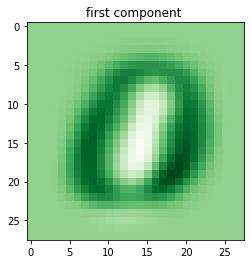

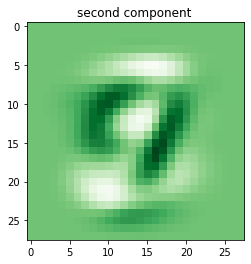

Ellipsis

In [6]:
from sklearn.decomposition import PCA

# Let's find the first 2 PCA components
num_components = 2
# START CODE HERE
pca = PCA(num_components)
pca.fit(train_images)
# END CODE HERE

# Reshape so they resemble images and we can print them
# START CODE HERE
plt.imshow(pca.components_[0].reshape(img_rows, img_cols),cmap='Greens')
plt.title("first component ")
plt.show()
# END CODE HERE

# Show the reshaped principal components
plt.imshow(pca.components_[1].reshape(img_rows, img_cols),cmap='Greens')
plt.title("second component ")
plt.show()
# START CODE HERE
...
# END CODE HERE

In [7]:
# Print the variance explained by those components
pca.explained_variance_ratio_

array([0.0970464 , 0.07095914], dtype=float32)

**Comment on the visualization in relation to the variance explained by only keeping the two principal components.**

Comment:
The explained variance tells you how much information (variance) can be attributed to each of the principal components.the first principal component contains 97.05% of the variance and the second principal component contains 70.96% of the variance.

Now, we will use Keras to implement the autoencoder. You can take a look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf) for some basic commands to use keras.

In this first case, we implement a **simple linear autoencoder**. Build it in order to have the same capacity as the PCA decomposition (2 hidden dimensions !) we made just above. 

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD

In [9]:
# Input layer
input_layer = Input(shape=(img_cols*img_rows,), name="input")

In [10]:
# Encoding layer
latent_view = Dense(num_components, name="latent")

In [11]:
# Decoding layer
output_layer = Dense(img_rows*img_cols, name="output")

In [12]:
model = keras.Sequential([input_layer, latent_view, output_layer], name='ae_model')
model.summary()



Model: "ae_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 latent (Dense)              (None, 2)                 1570      
                                                                 
 output (Dense)              (None, 784)               2352      
                                                                 
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


What loss shoud we use ? Choose the usual one and import it directly from Keras. You can use a simple ```SGD``` optimizer, and then compile the model; finally, train it to rebuild images from the original examples.  

In [13]:
from tensorflow.keras.losses import MeanSquaredError, MSE
loss = 'mse' #since we deal with normalized data

optimizer = SGD(lr=1e-1) 
model.compile(optimizer=optimizer, loss=loss) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
batch_size = 128
epochs = 10
train_images = train_images.reshape(-1, img_rows*img_cols)
test_images = test_images.reshape(-1, img_rows*img_cols)
# No noise here - we want to train a simple auto-encoder and compare visually with PCA
history = model.fit(train_images,
                    train_images,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1,
                    shuffle=True,
                    validation_data=(test_images, test_images))

Epoch 1/10
469/469 [==============================] - 4s 3ms/step - loss: 0.7775 - val_loss: 0.6373
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6269 - val_loss: 0.6088
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6185 - val_loss: 0.6076
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.6176 - val_loss: 0.6072
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.6172 - val_loss: 0.6070
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.6169 - val_loss: 0.6069
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.6166 - val_loss: 0.6064
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6164 - val_loss: 0.6062
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.6161 - val_loss: 0.6061
Epoch 10/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6159 - val_loss: 0.6059

Assuming that the name of your layer (obtained through the command ```model.summary()```) is ```'layer'```, here is the way to obtained the weights. Visualize the weights of the encoder and compare them to the two components obtained through the PCA.

In [15]:
weights_latent, bias_latent = model.get_layer('latent').get_weights()
weights_output, bias_output = model.get_layer('output').get_weights()

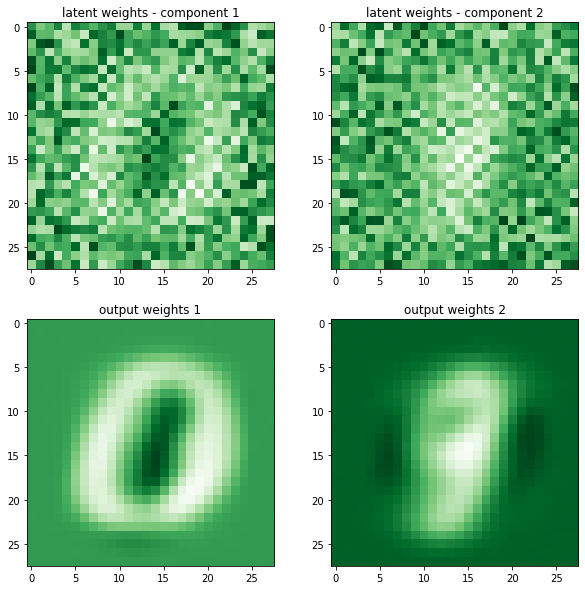

In [16]:
# Show the two dimensions of the encoder, in a similar manner to the principal components
# (after reshaping them as images !)
# START CODE HERE
figure, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0][0].imshow(weights_latent[:,0].reshape(img_rows, img_cols), cmap='Greens')
ax[0][0].set_title("latent weights - component 1")
ax[0][1].imshow(weights_latent[:,1].reshape(img_rows, img_cols), cmap='Greens')
ax[0][1].set_title("latent weights - component 2")
ax[1][0].imshow(weights_output[0,:].reshape(img_rows, img_cols), cmap='Greens')
ax[1][0].set_title("output weights 1")
ax[1][1].imshow(weights_output[1,:].reshape(img_rows, img_cols), cmap='Greens')
ax[1][1].set_title("output weights 2")

plt.show()

# END CODE HERE

comment:  
The result obtained is different from what we get in CPA, because it is difficult to know what number it is

Now, visualize the images rebuild by the network !

In [17]:
# Select a few images at random: look from n
n = np.random.randint(0,len(test_images)-5)

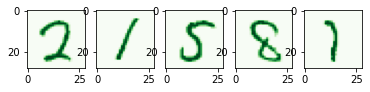

In [18]:
# Plot a few images from n  
f, ax = plt.subplots(1,5)
for i,a in enumerate(range(n,n+5)):
    # START CODE HERE
     ax[i].imshow(test_images[a].reshape(img_rows, img_cols), cmap='Greens')
    # END CODE HERE

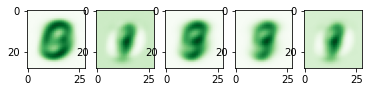

In [19]:
# Get the prediction from the model 
# START CODE HERE
pr_imgs = model.predict(test_images)
# END CODE HER

# ... and plot them 
f, ax = plt.subplots(1,5)
for i,a in enumerate(range(n,n+5)):
    # START CODE HERE
    ax[i].imshow(pr_imgs[a].reshape(img_rows, img_cols), cmap='Greens')
    # END CODE HERE

Comment:
This model does not predict images well, since it is difficult to recognize them

Do the same ( = build a new model) with a latent dimension that is largely higher than 2. Compare the visualizations and the images that are rebuilt. 

In [20]:
# START CODE HERE
num_components = 64

input_layer2 = Input(shape=(img_cols*img_rows,), name="input")
latent_layer2 = Dense(num_components, name="latent")
output_layer2 = Dense(img_rows*img_cols, name="output")
model2 = keras.Sequential([input_layer2, latent_layer2, output_layer2], name='model2')
model2.compile(optimizer='adam', loss='mse')
history = model2.fit(train_images,
                           train_images,
                           epochs=epochs,
                           batch_size=batch_size,
                           verbose=1,
                           shuffle=True,
                           validation_data=(test_images, test_images))

# END CODE HERE

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.2571 - val_loss: 0.1184
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1106 - val_loss: 0.1001
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1028 - val_loss: 0.0975
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1014 - val_loss: 0.0968
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1010 - val_loss: 0.0964
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1006 - val_loss: 0.0962
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1004 - val_loss: 0.0958
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1000 - val_loss: 0.0955
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0998 - val_loss: 0.0954
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0996 - val_loss: 0.0954

## Denoising auto-encoder 

Now, we can implement a **de-noising autoencoder**. The following function will transform an array of images by adding it random noise. Create a new autoencoder model, this time with **more layers** and **non-linear activations** (like the ReLU) and train it to rebuild the de-noised images. Display some testing images, with noise, and re-built. 

In [21]:
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )
    return noisy_array

In [22]:
# Create a copy of the data with added noise
noisy_train_images = noise(train_images)
noisy_test_images = noise(test_images)

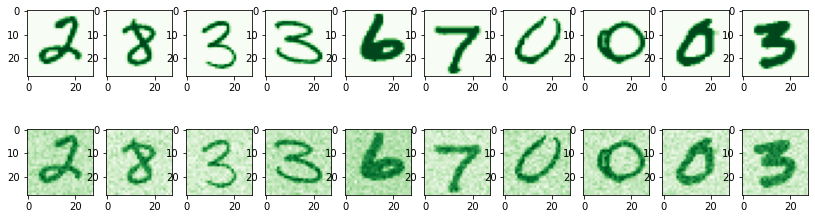

In [23]:
# Visualize some of the images with noise against the originals
# START CODE HERE
index = np.random.randint(0, noisy_test_images.shape[0], 10)
fig, ax = plt.subplots(2, 10, figsize=(14, 4))
for i, n in enumerate(index):
    ax[0][i].imshow(test_images[n].reshape(img_rows, img_cols), cmap='Greens')
    ax[1][i].imshow(noisy_test_images[n].reshape(img_rows, img_cols), cmap='Greens')
# END CODE HERE

In [24]:
# Build a new model with more layers and Relu activations
# START CODE HERE
input_layer3 = Input(shape=(img_cols*img_rows,), name="input")

latent_layer3  = Dense(256, activation='relu')(input_layer3)
latent_layer4  = Dense(128, activation='relu')(latent_layer3)
latent_layer5  = Dense(64, activation='relu')(latent_layer4)

output_layer3  = Dense(128, activation='relu')(latent_layer5)
output_layer4  = Dense(256, activation='relu')(latent_layer3)
output_layer5   = Dense(784, activation='relu')(latent_layer4)
final_model = Model(input_layer3, output_layer5, name="final_model")
final_model.compile(optimizer='adam', loss='mse')
final_model.summary()
# END CODE HERE

Model: "final_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 334,992
Trainable params: 334,992
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile it but here, use noised data as inputs !
# START CODE HERE
batch_size = 1024
epochs = 20
noisy_train_images = train_images
noisy_test_images = test_images
history = final_model.fit(noisy_train_images,
                               noisy_train_images,
                               epochs=epochs,
                               batch_size=batch_size,
                               verbose=1,
                               shuffle=True,
                               validation_data=(noisy_test_images, noisy_test_images))
# END CODE HERE

Epoch 1/20
59/59 [==============================] - 1s 9ms/step - loss: 0.6367 - val_loss: 0.4056
Epoch 2/20
59/59 [==============================] - 0s 7ms/step - loss: 0.3426 - val_loss: 0.2973
Epoch 3/20
59/59 [==============================] - 0s 7ms/step - loss: 0.2860 - val_loss: 0.2713
Epoch 4/20
59/59 [==============================] - 0s 7ms/step - loss: 0.2673 - val_loss: 0.2587
Epoch 5/20
59/59 [==============================] - 0s 7ms/step - loss: 0.2576 - val_loss: 0.2520
Epoch 6/20
59/59 [==============================] - 0s 7ms/step - loss: 0.2515 - val_loss: 0.2468
Epoch 7/20
59/59 [==============================] - 0s 7ms/step - loss: 0.2471 - val_loss: 0.2434
Epoch 8/20
59/59 [==============================] - 0s 7ms/step - loss: 0.2438 - val_loss: 0.2408
Epoch 9/20
59/59 [==============================] - 0s 7ms/step - loss: 0.2413 - val_loss: 0.2384
Epoch 10/20
59/59 [==============================] - 0s 7ms/step - loss: 0.2393 - val_loss: 0.2367
Epoch 11/20
59/59 [

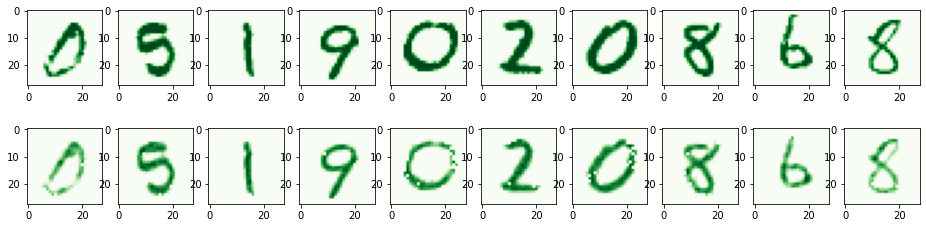

In [26]:
# Visualize the images rebuilt by the model !
# START CODE HERE
final_model_img = final_model.predict(noisy_test_images)

index2 = np.random.randint(0, noisy_test_images.shape[0], 10)
fig, ax = plt.subplots(2, 10, figsize=(16, 4))
for i, n in enumerate(index2):
    ax[0][i].imshow(noisy_test_images[n].reshape(img_rows, img_cols), cmap='Greens')
    ax[1][i].imshow(final_model_img[n].reshape(img_rows, img_cols), cmap='Greens')

# END CODE HERE

Comment:Imagies are more recognizable when we add more layers and non-linear Relu activation function.

**Assuming that we normalize the images to be in the 0-1 range, what other loss function could we use ?**

We can use 

*   Cross-Entropy: it is used with classification problem where we are mapping input variables to a class labelinterested in
*   negative log-likelihood $$ l_{MLE}= -\mathbf{log}  l(θ)$$ It corresponds to the Kullback-Leibler divergence between the data
distribution and the model distribution $$ l_{MLE}= D_{KL}  (p_{data},p_{θ})$$



